# Telstra Kaggle Competition Exploratory Data Analysis (2016)

## 3/2/2018

## Hiro Miyake

This notebook deals with data provided in the [Telstra Kaggle competition](https://www.kaggle.com/c/telstra-recruiting-network) held in 2016. Modeling is performed in the companion notebook.

# 1. Initial Setup and Load the Data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

from collections import Counter

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
event = pd.read_csv("data/event_type.csv")
log = pd.read_csv("data/log_feature.csv")
resource = pd.read_csv("data/resource_type.csv")
severity = pd.read_csv("data/severity_type.csv")

# 2. Take a basic look at the data

In [3]:
print train.count()
train.head()

id                7381
location          7381
fault_severity    7381
dtype: int64


,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [4]:
print test.count()
test.head()

id          11171
location    11171
dtype: int64


,id,location
0,11066,location 481
1,18000,location 962
2,16964,location 491
3,4795,location 532
4,3392,location 600


In [5]:
print event.count()
event.head()

id            31170
event_type    31170
dtype: int64


,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


Note the same id can have multiple event_type values.

In [6]:
print log.count()
log.head()

id             58671
log_feature    58671
volume         58671
dtype: int64


,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


Note the same id can have multiple log_feature values.

In [7]:
print resource.count()
resource.head()

id               21076
resource_type    21076
dtype: int64


,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8


In [8]:
print severity.count()
severity.head()

id               18552
severity_type    18552
dtype: int64


,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


Note that probably each `id` has only one unique `severity_type` value.

In [9]:
train.describe()

,id,fault_severity
count,7381.000000,7381.00000
mean,9264.649099,0.45021
std,5349.290176,0.66656
min,1.000000,0.00000
25%,4647.000000,0.00000
50%,9222.000000,0.00000
75%,13885.000000,1.00000
max,18550.000000,2.00000


# 3. Dig deeper into the data

Let's look at how often each of the outcomes appear in the training data.

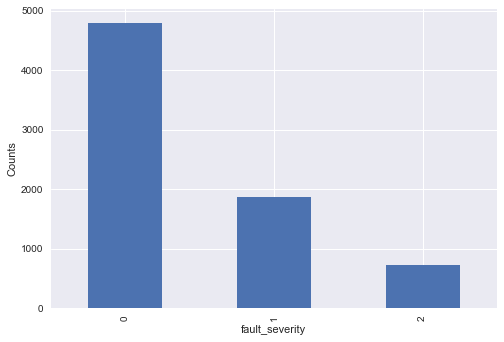

0    4784
1    1871
2     726
Name: fault_severity, dtype: int64

In [10]:
train.fault_severity.value_counts().plot(kind='bar')
plt.xlabel('fault_severity')
plt.ylabel('Counts')
plt.show()

train.fault_severity.value_counts()

We see that not all outcomes are equally likely.

In [11]:
## Get unique values in pandas column
## https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/
print 'Number of unique location values: ' + str(len(train.location.unique()))
print 'Number of unique ID values: ' + str(len(train.id.unique()))

Number of unique location values: 929
Number of unique ID values: 7381


Note that although there are 7381 unique rows/IDs in the training set, there are only 929 unique locations. This must mean that a few of the different rows correspond to the same locations.

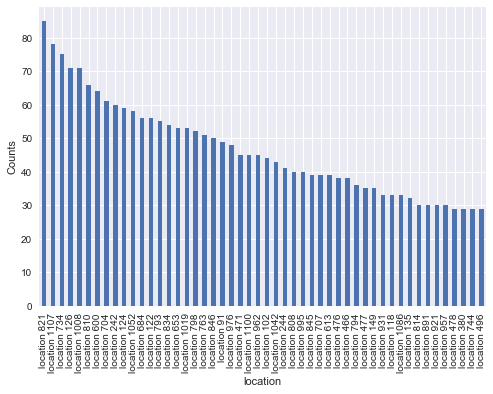

In [12]:
#train.location.value_counts().plot(kind='bar')
train.location.value_counts()[:50].plot(kind='bar')
plt.xlabel('location')
plt.ylabel('Counts')
plt.show()

We see that some locations occur more frequently than others.

In [13]:
pd.merge(train, test, how='inner', on=['id'])

,id,location_x,fault_severity,location_y


This shows that the IDs in the train and test sets are distinct, as you would expect them to be.

In [14]:
pd.merge(train, test, how='inner', on=['location']).head()

,id_x,location,fault_severity,id_y
0,14121,location 118,1,13831
1,14121,location 118,1,9613
2,14121,location 118,1,10484
3,14121,location 118,1,942
4,14121,location 118,1,13895


This shows that the same locations appear in both the training and test data. It may make sense to divide the data by location. It's possible id could contain useful information for prediction.

In [15]:
print 'There are ' + str(len(event.event_type.unique())) + ' distinct event_type values.'

There are 53 distinct event_type values.


In [16]:
print 'There are ' + str(len(log.log_feature.unique())) + ' distinct log_feature values.'

There are 386 distinct log_feature values.


In [17]:
print 'There are ' + str(len(resource.resource_type.unique())) + ' distinct resource_type values.'

There are 10 distinct resource_type values.


In [18]:
print 'There are ' + str(len(severity.severity_type.unique())) + ' distinct severity_type values.'

There are 5 distinct severity_type values.


# 4. Look for correlations across features

In [19]:
train.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


Try turning the location value into a numerical value to see if the numerical location contains any useful information.

In [20]:
train2 = train.copy()

## https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html
## https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_dataframes/
train2['location'] = train2['location'].apply(lambda x: int(x.split(' ')[1]))
train2.head()

,id,location,fault_severity
0,14121,118,1
1,9320,91,0
2,14394,152,1
3,8218,931,1
4,14804,120,0


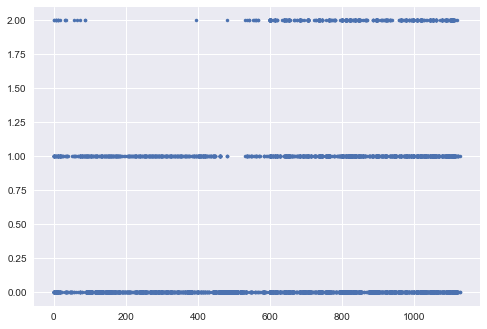

In [21]:
plt.plot(train2['location'], train2['fault_severity'], '.')
plt.show()

We see that `fault_severity` values of 0, 1, and 2 are not uniformly distributed over the location number.

In [22]:
severity2 = severity.copy()
severity2['severity_type'] = severity2['severity_type'].apply(lambda x: int(x.split(' ')[1]))
severity2.head()

,id,severity_type
0,6597,2
1,8011,2
2,2597,2
3,5022,1
4,6852,1


In [23]:
train3 = train2.merge(severity2, on = 'id', how = 'left')
train3.head()

,id,location,fault_severity,severity_type
0,14121,118,1,2
1,9320,91,0,2
2,14394,152,1,2
3,8218,931,1,1
4,14804,120,0,1


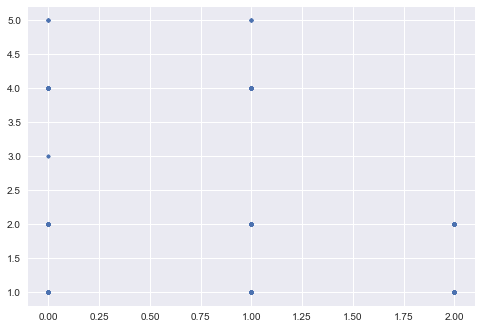

In [24]:
plt.plot(train3['fault_severity'], train3['severity_type'], '.')
plt.show()

In [25]:
severity['severity_type'].value_counts()

severity_type 2    8737
severity_type 1    8728
severity_type 4    1014
severity_type 5      65
severity_type 3       8
Name: severity_type, dtype: int64

We see that if the `severity_type` is greater than 2, it is never `fault_severity` of 2. Also, `severity_type` of 3 only appears when `fault_severity` is 0. This can be the basis of a simple rule-based prediction.

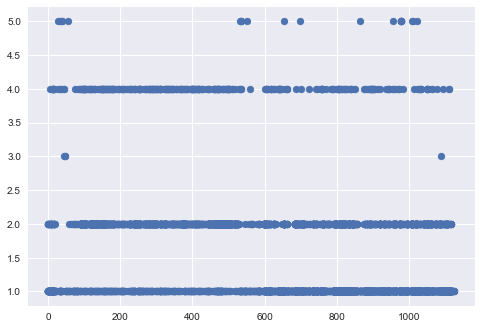

In [26]:
plt.scatter(train3['location'], train3['severity_type'])
#plt.scatter(train3['location'], train3['severity_type'], c = train3['fault_severity'])
#plt.legend(loc = 2)
plt.show()